In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [9]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt



In [10]:
python_executable = os.path.abspath(sys.executable)
venv_parent_dir = os.path.dirname(os.path.dirname(python_executable))


data_path = "../Data2/products.csv"
df = pd.read_csv(data_path)

In [11]:
products_df = df.dropna()

products_df_sample = products_df.head(500)

products_df_sample["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

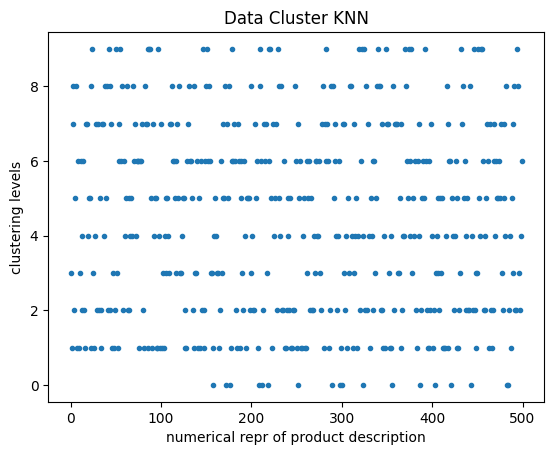

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(products_df_sample["product_description"])

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

plt.plot(y_kmeans, ".")
plt.xlabel("numerical repr of product description")
plt.ylabel("clustering levels")
plt.title("Data Cluster KNN")
plt.show()

In [13]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print_cluster(i)    

Top terms per cluster:
Cluster 0:
 rug
 shades
 slightly
 order
 vary
 bamboo
 size
 blind
 dimensions
 natural
Cluster 1:
 water
 toilet
 design
 flush
 bowl
 helps
 high
 help
 cover
 features
Cluster 2:
 door
 65
 proposition
 nbsp
 residents
 california
 painted
 primed
 wood
 match
Cluster 3:
 door
 steel
 frame
 patio
 lbs
 shelf
 durable
 easy
 roof
 adjustable
Cluster 4:
 cycle
 oven
 cooking
 cu
 wash
 steam
 ft
 drum
 clothes
 options
Cluster 5:
 tape
 easy
 tool
 water
 pull
 duty
 handle
 heavy
 construction
 wheels
Cluster 6:
 air
 power
 light
 water
 fan
 heater
 control
 watt
 cooling
 insulation
Cluster 7:
 ft
 wood
 concrete
 stake
 100
 vary
 store
 board
 product
 painting
Cluster 8:
 wall
 finish
 use
 design
 tile
 piece
 easy
 ft
 water
 trim
Cluster 9:
 light
 drill
 volt
 metal
 tool
 cutting
 lithium
 battery
 power
 max


In [ ]:
def show_recommendations(product): #recommendation based on product description
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("cutting tool")

Cluster 5:
 insulation
 metal
 seal
 use
 ft
 roof
 attic
 water
 roofing
 provides


In [ ]:
show_recommendations("spray paint")

Cluster 9:
 wood
 paint
 concrete
 frame
 patio
 color
 stake
 outdoor
 steel
 resistant
